### Analyzing single-cell distributions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Define input directory

In [2]:
# Specify the directory containing the CSV files
directory = '/..../CSVs/SPC' # update path!

# List all CSV files in the directory
all_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# Separate the files into two lists based on the presence of "threshold" in the filename
threshold_files = [f for f in all_files if 'threshold' in f]
non_threshold_files = [f for f in all_files if 'threshold' not in f]

# Function to read and combine files from a list into a DataFrame
def combine_files(file_list):
    dataframes = []
    for file in file_list:
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path, sep=';')
        dataframes.append(df)
    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

# Combine the files for each list
df_threshold = combine_files(threshold_files)
df_non_threshold = combine_files(non_threshold_files)

In [3]:
# Set 'ID' and 'label' as a multi-index
df_threshold.set_index(['ID', 'label'], inplace=True)
df_non_threshold.set_index(['ID', 'label'], inplace=True)

print("Dataframe with threshold:")
print(df_threshold.head())
print("\nDataframe without threshold:")
print(df_non_threshold.head())

Dataframe with threshold:
                                 OPAL480    OPAL520  OPAL570  OPAL620  \
ID                      label                                           
20456880_1A_13075-36001 1      90.815697  29.947344      0.0      0.0   
                        2      51.624148  37.748219      0.0      0.0   
                        3       0.000000  16.003126      0.0      0.0   
                        4       0.000000  16.535085      0.0      0.0   
                        5       0.000000  28.871627      0.0      0.0   

                                 OPAL690  OPAL780  
ID                      label                      
20456880_1A_13075-36001 1       0.000000      0.0  
                        2       0.000000      0.0  
                        3      18.250576      0.0  
                        4       0.000000      0.0  
                        5       0.000000      0.0  

Dataframe without threshold:
                                    DAPI    OPAL480    OPAL520   OPA

### Plot distributions per channel: thresholding approach vs single-cell original values

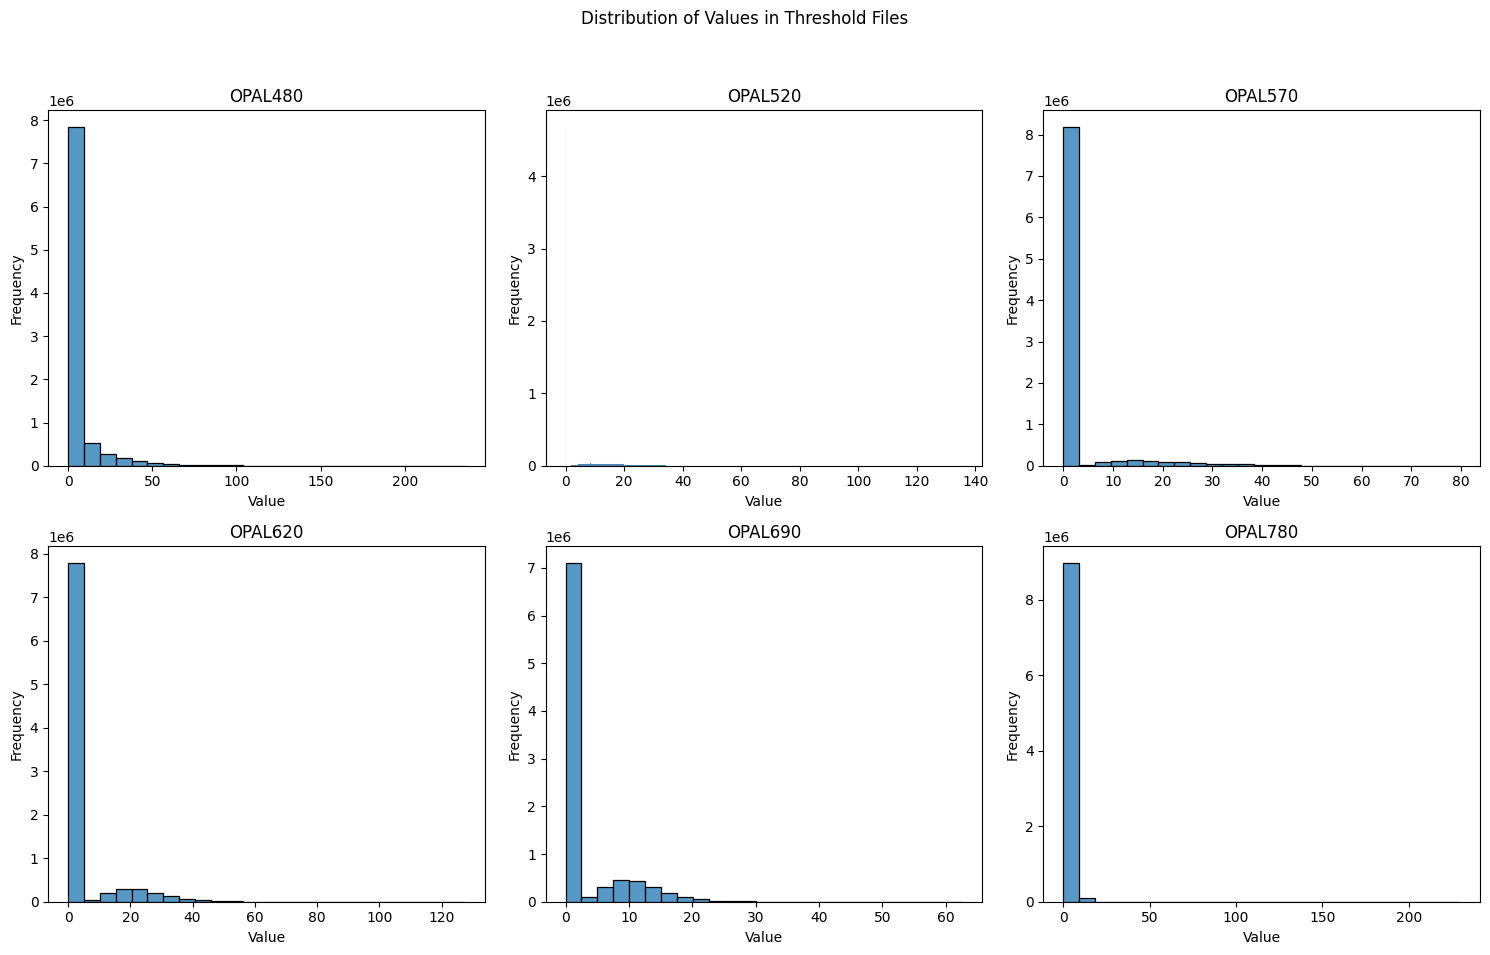

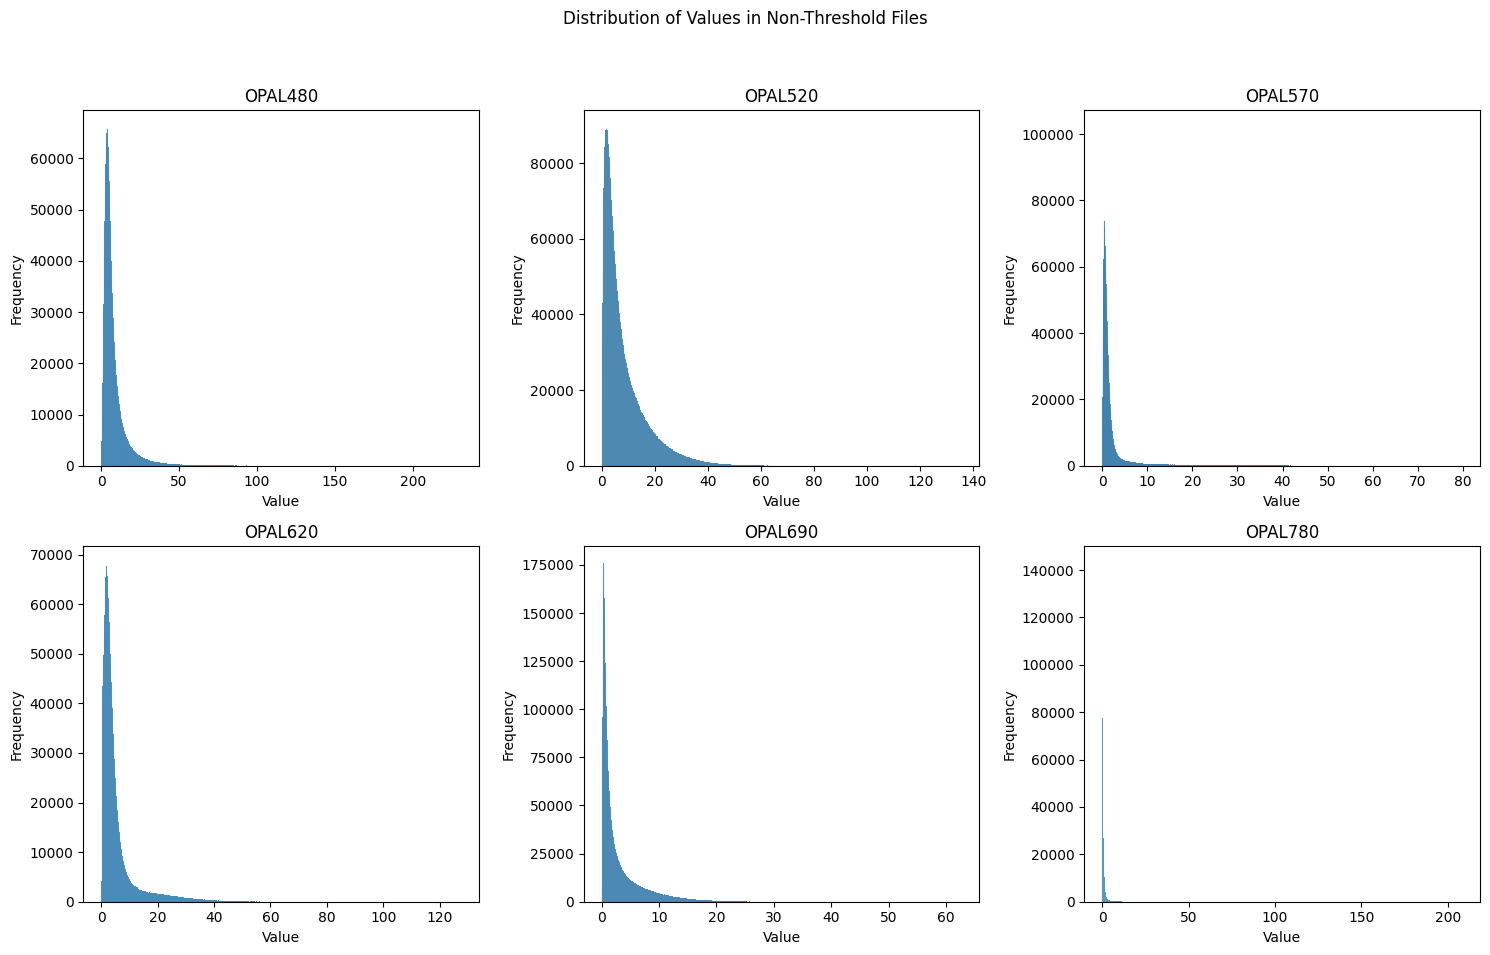

In [4]:
columns_to_plot = ['OPAL480', 'OPAL520', 'OPAL570', 'OPAL620', 'OPAL690', 'OPAL780']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10)) 
fig.suptitle('Distribution of Values in Threshold Files')

for ax, column in zip(axes.flatten(), columns_to_plot):
    sns.histplot(df_threshold[column], ax=ax, kde=False)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot for DataFrame without 'threshold'
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Distribution of Values in Non-Threshold Files')

for ax, column in zip(axes.flatten(), columns_to_plot):
    sns.histplot(df_non_threshold[column], ax=ax, kde=False)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Plot log-distributions log(1 + x) per channel: thresholding approach vs single-cell original values

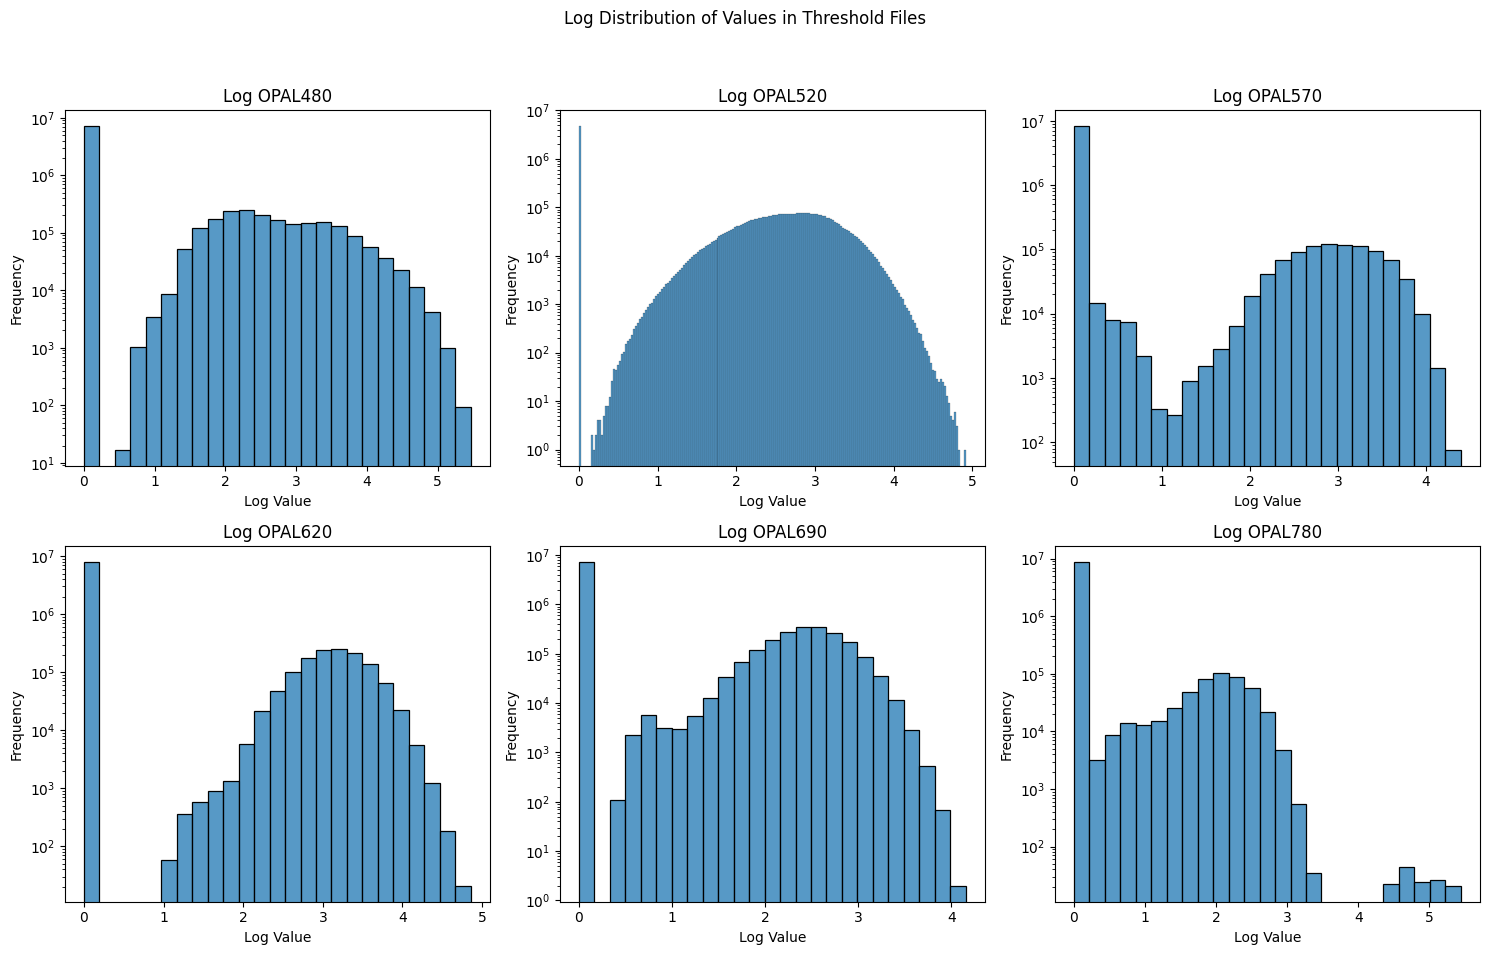

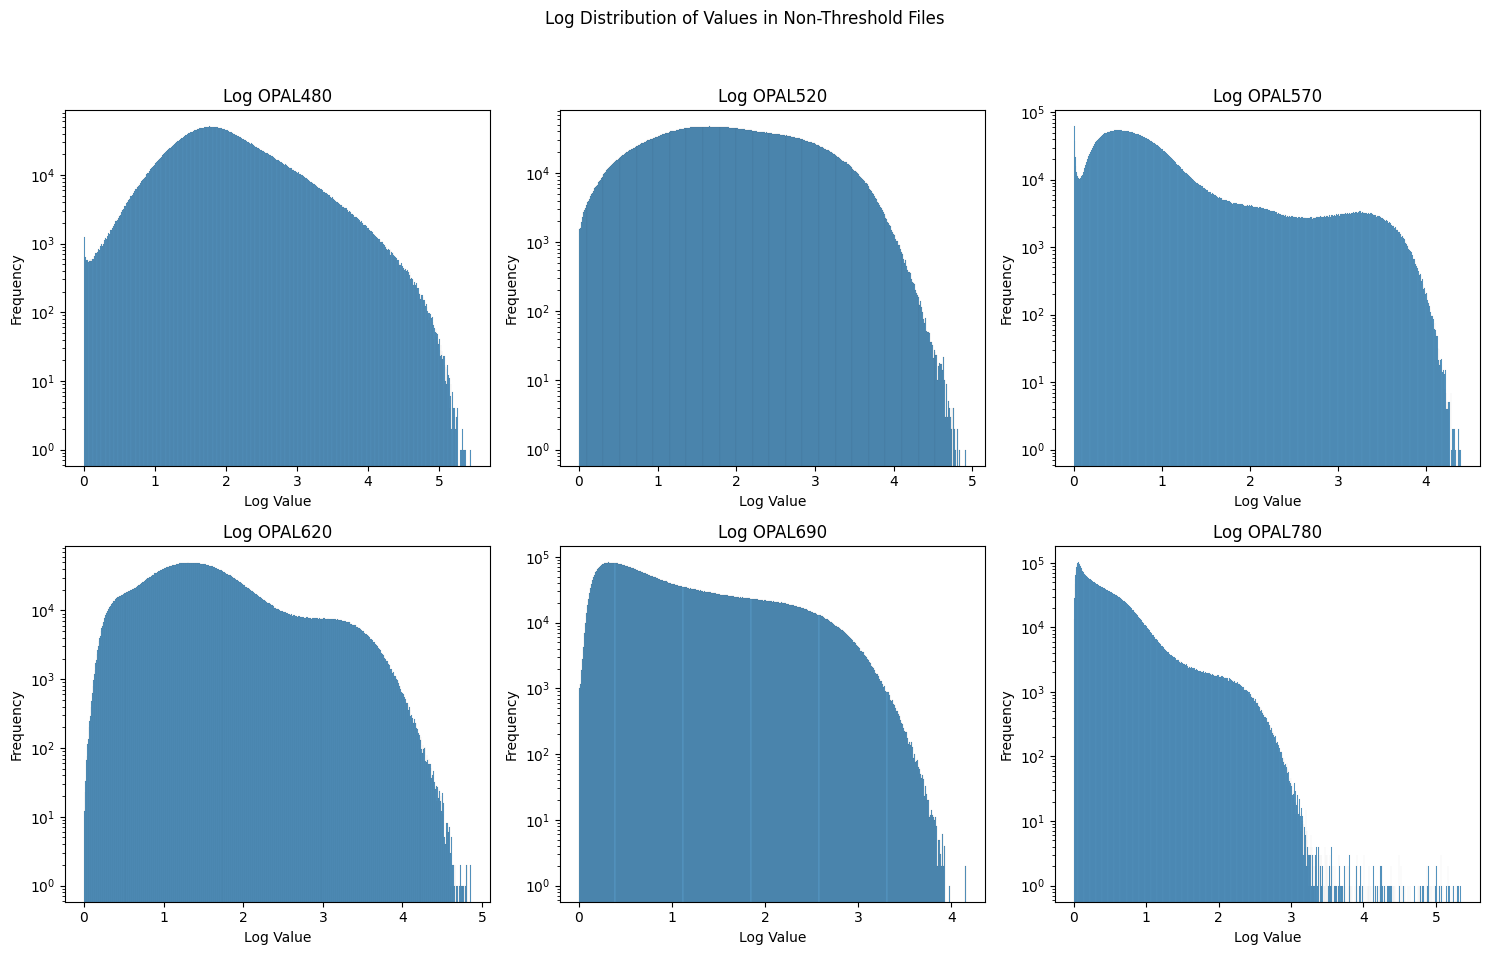

In [7]:

columns_to_plot = ['OPAL480', 'OPAL520', 'OPAL570', 'OPAL620', 'OPAL690', 'OPAL780']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  
fig.suptitle('Log Distribution of Values in Threshold Files')

for ax, column in zip(axes.flatten(), columns_to_plot):
    # Adding a small constant to avoid taking log of zero
    sns.histplot(np.log(df_threshold[column] + 1), ax=ax, kde=False)
    ax.set_title(f'Log {column}')
    ax.set_xlabel('Log Value')
    ax.set_ylabel('Frequency')
    ax.set_yscale('log')  # Setting y-axis to logarithmic scale

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()

# Plot for DataFrame without 'threshold'
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Log Distribution of Values in Non-Threshold Files')

for ax, column in zip(axes.flatten(), columns_to_plot):
    # Adding a small constant to avoid taking log of zero
    sns.histplot(np.log(df_non_threshold[column] + 1), ax=ax, kde=False)
    ax.set_title(f'Log {column}')
    ax.set_xlabel('Log Value')
    ax.set_ylabel('Frequency')
    ax.set_yscale('log') 

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Plot log-distributions log(1 + x) per channel over z-normalized data: thresholding approach vs single-cell original values

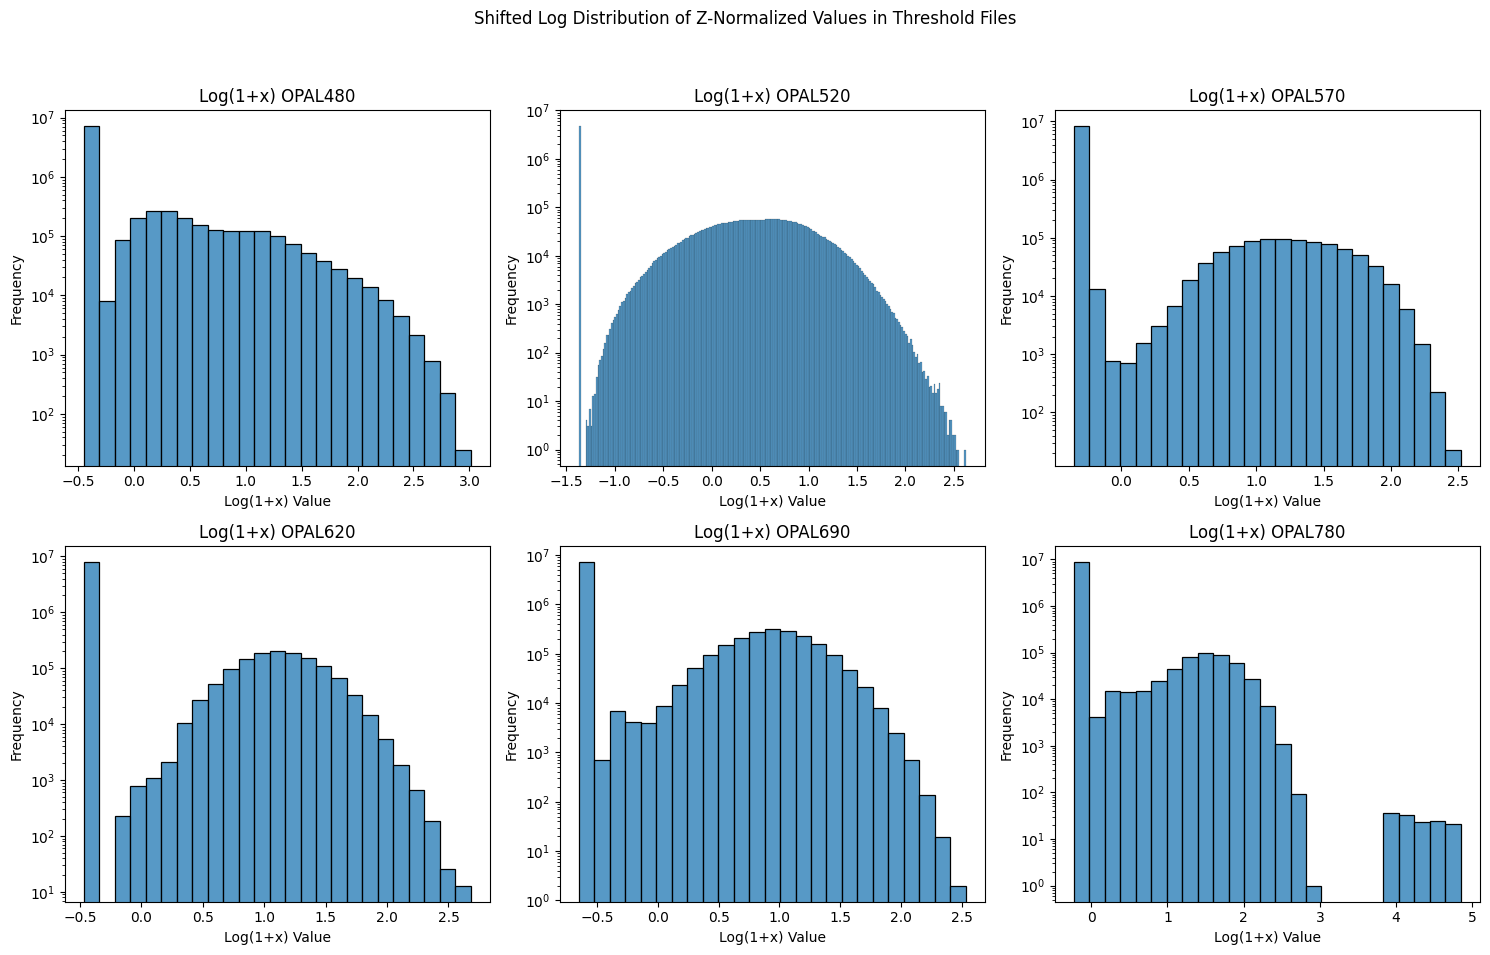

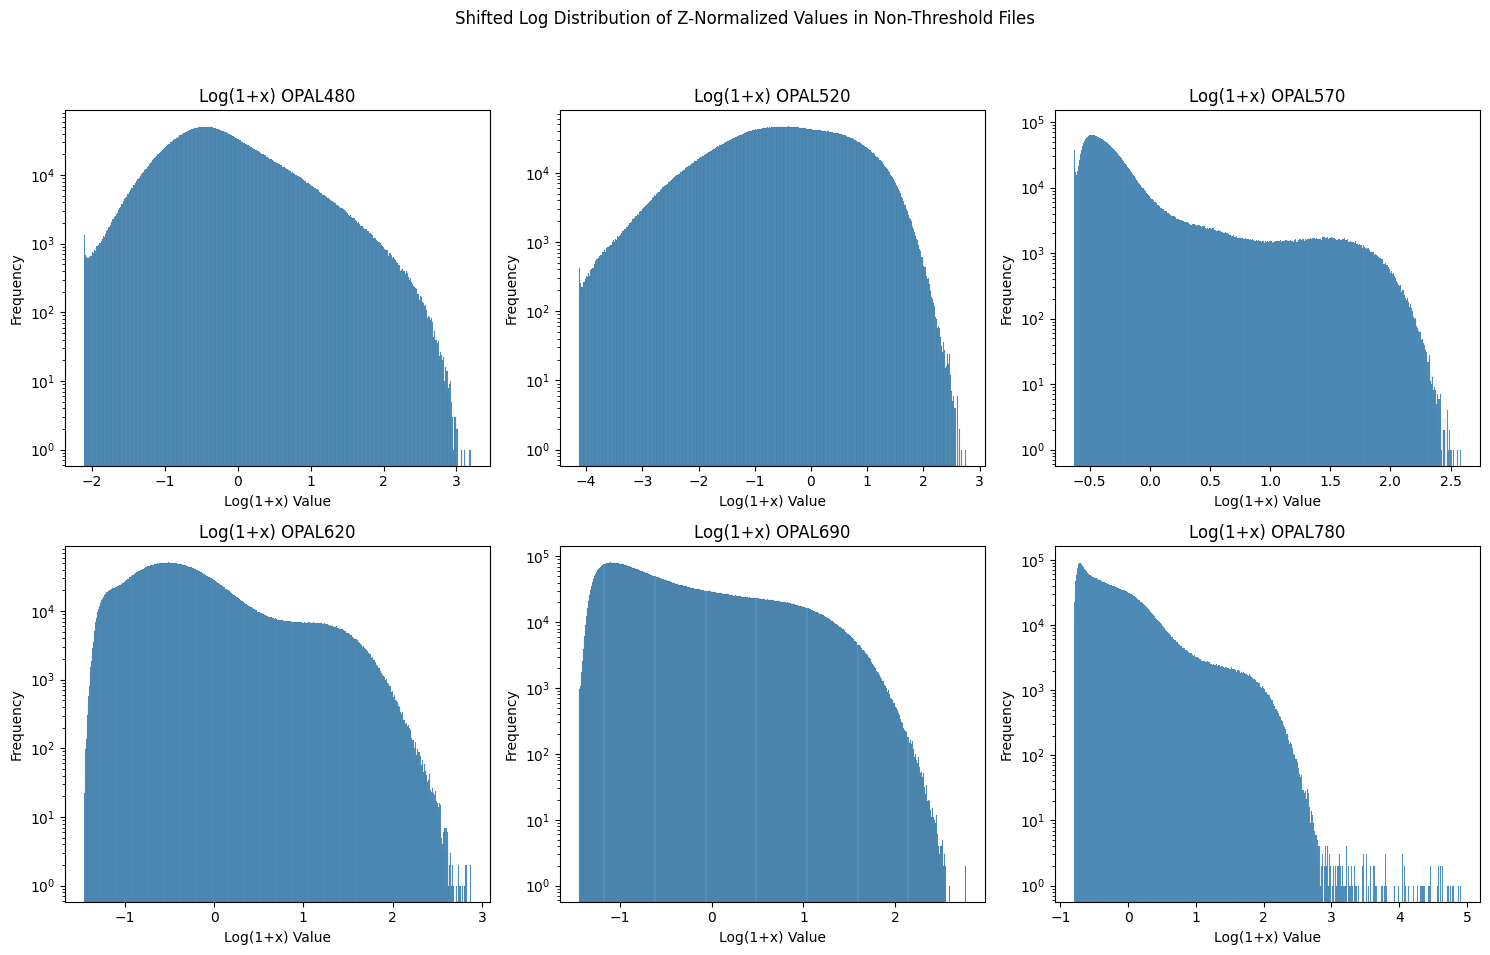

In [8]:

# Function to apply z-normalization
def z_normalize(data):
    return (data - data.mean()) / data.std()

columns_to_plot = ['OPAL480', 'OPAL520', 'OPAL570', 'OPAL620', 'OPAL690', 'OPAL780']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  
fig.suptitle('Shifted Log Distribution of Z-Normalized Values in Threshold Files')

for ax, column in zip(axes.flatten(), columns_to_plot):
    # Apply z-normalization and shifted log transformation
    normalized_data = z_normalize(df_threshold[column])
    sns.histplot(np.log1p(normalized_data), ax=ax, kde=False)
    ax.set_title(f'Log(1+x) {column}')
    ax.set_xlabel('Log(1+x) Value')
    ax.set_ylabel('Frequency')
    ax.set_yscale('log')  

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()

# Plot for DataFrame without 'threshold'
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Shifted Log Distribution of Z-Normalized Values in Non-Threshold Files')

for ax, column in zip(axes.flatten(), columns_to_plot):
    # Apply z-normalization and shifted log transformation
    normalized_data = z_normalize(df_non_threshold[column])
    sns.histplot(np.log1p(normalized_data), ax=ax, kde=False)
    ax.set_title(f'Log(1+x) {column}')
    ax.set_xlabel('Log(1+x) Value')
    ax.set_ylabel('Frequency')
    ax.set_yscale('log')  

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
